# Import Libraries

In [3]:
!ls /kaggle/input/resumes1

 Abiral_Pandey_Fullstack_Java.pdf
'Achyuth Resume_8.pdf'
 Adelina_Erimia_PMP1.pdf
'Adhi Gopalam - SM.pdf'
 AjayKumar.pdf
'Akhil_Sr BSA.pdf'
'Alekhya Resume.pdf'
'Amar Sr BSA.pdf'
'Ami Jape.pdf'
'Amrinder Business Analyst.pdf'
'Amulya Komatineni.pdf'
 AnilAgarwal.pdf
'Anil Krishna Mogalaturthi.pdf'
'Anudeep N_Sr Java Developer.pdf'
'Ashok Jayakumar - PM.pdf'
'Ashwini J2EE Developer.pdf'
 Atul_Mathur_Resume.pdf
'Avathika BA-Healthcare_.pdf'
'avinash G.pdf'
'BA - Abhishek.pdf'
'BA Kiran.pdf'
'Balaji Gopalakrishnan Project Manager.pdf'
'Balakrishna Sudabathula.pdf'
'BA - Navneet.pdf'
'Bapuji Hadoop developer.pdf'
'BA with INV.pdf'
'Bharat Arora_CV_PMP _ ERP1.pdf'
'Bharatha BA Resume.pdf'
'Brahma-Resume (BA).pdf'
'B Shaker-Sr BSA-Scrum Master.pdf'
'B Suresh Kumar_Project Manager_1.pdf'
'Business Analyst_GHyma.pdf'
 Chandler_BA.pdf
'chenna kesava.pdf'
'CHETAN_Sr Java Developer.pdf'
'Dantu Padmasri - Project Manager.pdf'
 Dave.pdf
'Deepika Chintalapati.pdf'
'Deepika DC.pdf'
 Derik.pdf
'Dhanal

In [4]:
!ls /kaggle/input/preprocessed-resume

preprocessed_resume.csv


In [5]:
!pip install PyMuPDF
!pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 58.6 MB/s eta 0:00:00:00:0100:01


In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
import fitz
import pandas as pd

#Text preprocessing tools
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import *

#Similarity checking tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Import PDF resumes

In [10]:
import glob
pdf_files = glob.glob('/kaggle/input/resumes1/*.pdf')

In [11]:
pdf_files

['/kaggle/input/resumes1/PM RESUME.pdf',
 '/kaggle/input/resumes1/Srivatsan_Project_Manager.pdf',
 '/kaggle/input/resumes1/Rao_Java.pdf',
 '/kaggle/input/resumes1/VIJETHA G.pdf',
 '/kaggle/input/resumes1/kalyan das.pdf',
 '/kaggle/input/resumes1/Brahma-Resume (BA).pdf',
 '/kaggle/input/resumes1/Krishna Sr. BSA Resume.pdf',
 '/kaggle/input/resumes1/Priya_Sharma.pdf',
 '/kaggle/input/resumes1/Vishnu Java dev.pdf',
 '/kaggle/input/resumes1/Adhi Gopalam - SM.pdf',
 '/kaggle/input/resumes1/KY BA PM UPDATED RESUME.pdf',
 '/kaggle/input/resumes1/Ami Jape.pdf',
 '/kaggle/input/resumes1/Sundar_Java_8 Years..pdf',
 '/kaggle/input/resumes1/Adelina_Erimia_PMP1.pdf',
 '/kaggle/input/resumes1/Resume Vishal PM - MSIS PMP-PMI.pdf',
 '/kaggle/input/resumes1/Atul_Mathur_Resume.pdf',
 '/kaggle/input/resumes1/Mani_Hadoop.pdf',
 '/kaggle/input/resumes1/srinivas b.pdf',
 '/kaggle/input/resumes1/Smita Kamble_Resume.pdf',
 '/kaggle/input/resumes1/Jagan S Iyer PM.pdf',
 '/kaggle/input/resumes1/Samir Naik-NJ - 

# Resume Text Preprocessing

In [13]:
def getWordnetPos(words):
    tag=pos_tag([words])[0][1][0].upper()
    tag_dict={"J":wordnet.ADJ,
              "N":wordnet.NOUN,
              "V":wordnet.VERB,
              "R":wordnet.ADV
             }
    return tag_dict.get(tag,wordnet.NOUN)

def cv_preprocessing(cv_data):
  #Tokenization
  tokenized_text=word_tokenize(cv_data)

  #Remove stopwords
  stop_words = set(stopwords.words('english'))
  filter_text=[]
  for token in tokenized_text:
    if token not in stop_words:
          filter_text.append(token)

  #POS and lemmatize
  lemmatizer = WordNetLemmatizer()
  lemmatizeResults=[lemmatizer.lemmatize(token,getWordnetPos(token)) for token in filter_text]
  return ' '.join(lemmatizeResults)

def pdftotext(m,preprocessing=False):
  #Open pdf file
  doc=fitz.open(m)

  #Convert pdf to text
  text=''
  for page in doc:
    text+=page.get_text()

  #Remove new line
  text=' '.join(text.split('\n'))

  if preprocessing:
    return cv_preprocessing(text)
  else:
    return text

In [14]:
preprocessed_text=[]
resume_pdf=[]
for i in range(len(pdf_files)):
    resume_pdf.append(pdf_files[i].split('/')[-1])
    cleaned_text=pdftotext(pdf_files[i],preprocessing=True)
    preprocessed_text.append(cleaned_text)

#Preprocessed resume
resume_preprocessed_data={'Resume Filename':resume_pdf,'Preprocessed Resume':preprocessed_text}
#Insert resume data into dataframe
df_preprocessed_resume=pd.DataFrame(resume_preprocessed_data)

In [15]:
df_preprocessed_resume

,Resume Filename,Preprocessed Resume
0,PM RESUME.pdf,Avinash avinashgne @ gmail.com | 408-676-6390 ...
1,Srivatsan_Project_Manager.pdf,Srivatsan Ramabhadran 925-349-8018 sreevatsan7...
2,Rao_Java.pdf,1 Rao Java Developer Email : raorjavadev7 @ gm...
3,VIJETHA G.pdf,Vijetha Email : reddy.vijethaa @ gmail.com Pho...
4,kalyan das.pdf,Kalyan Das Senior Full Stack Java Developer | ...
...,...,...
216,CHETAN_Sr Java Developer.pdf,Chetan Babu Mobile : 405-896-0512 | Email : bo...
217,Krishna_BSA.pdf,0pt12pt plus 4pt minus 2pt6pt plus 2pt minus 2...
218,Syed_Zia_Ashraf.pdf,Syed Zia Ashraf +1-203-541-0012 scott @ egbsys...
219,Gautami Bulusu Mobile Testing 3.pdf,"Gautami Bulusu Contact : Krish , krish @ egrov..."


In [17]:
df_preprocessed_resume['Preprocessed Resume']

0      Avinash avinashgne @ gmail.com | 408-676-6390 ...
1      Srivatsan Ramabhadran 925-349-8018 sreevatsan7...
2      1 Rao Java Developer Email : raorjavadev7 @ gm...
3      Vijetha Email : reddy.vijethaa @ gmail.com Pho...
4      Kalyan Das Senior Full Stack Java Developer | ...
                             ...                        
216    Chetan Babu Mobile : 405-896-0512 | Email : bo...
217    0pt12pt plus 4pt minus 2pt6pt plus 2pt minus 2...
218    Syed Zia Ashraf +1-203-541-0012 scott @ egbsys...
219    Gautami Bulusu Contact : Krish , krish @ egrov...
220    Nilesh Banthiya +91 9427399390 | nilubanthiya ...
Name: Preprocessed Resume, Length: 221, dtype: object

# Similarity Resume Checking

In [18]:
def similarity_resume_checking():
    while(True):
        flagFound=False
        search_filename=input('Input the filename you want to search for the similarity: ')
        for i in range(len(df_preprocessed_resume)):
            if df_preprocessed_resume.iloc[i]['Resume Filename'].strip()==search_filename.strip():
                inputFileContent= df_preprocessed_resume.iloc[i]['Preprocessed Resume']
                flagFound=True
                break

        if flagFound==False:
            print('Sorry no such resume PDF found')
            ctn=input('\nDo you want to continue search ? (Y/N) >> ')
            if ctn=='N' or ctn=='n':
                break
        else:
            break
            
    similary_score={}
    for i in df_preprocessed_resume['Resume Filename']:
        vectorizer=TfidfVectorizer()
        tf_matrix=vectorizer.fit_transform([i,inputFileContent])
        match_percentage=round((cosine_similarity(tf_matrix)[0][1])*100,2)
        if match_percentage!=0.00:
            similary_score[match_percentage]=i
    
    print('\nSimilarity Resume Checking')
    print('------------------------------')
    print('Resume - ',search_filename,' similarity content with other resumes')
    print('==============================================================================')
    for i in sorted(similary_score.keys())[::-1]:
        print(f'Resume - {similary_score[i]:50} match {i:5}%')
        
similarity_resume_checking()

Input the filename you want to search for the similarity:  Yugesh_Resume.pdf



Similarity Resume Checking
------------------------------
Resume -  Yugesh_Resume.pdf  similarity content with other resumes
Resume - CHETAN_Sr Java Developer.pdf                       match 10.92%
Resume - Pavan Kumar Full Stack Java Developer.pdf          match  9.52%
Resume - Sumanth Manne Java Developer.pdf                   match  9.46%
Resume - Ashwini J2EE Developer.pdf                         match  8.81%
Resume - Sharath Java.pdf                                   match  7.45%
Resume - Shiva G-Java Resume.pdf                            match   6.3%
Resume - Bapuji Hadoop developer.pdf                        match  3.75%
Resume - Samir Naik-NJ - Feb 2018-V6.0.pdf                  match  1.42%
Resume - Resume - PM Agile-Scrum.pdf                        match  1.16%
Resume - Ujvala BA Feb 20.pdf                               match   1.1%
Resume - employer_mounika details.pdf                       match  0.74%
Resume - SUNITHA Project Manager (1).pdf                    match  0.62

In [19]:
def similarity_job_descriptions():
    flagFound=False
    job_description=input('Enter job descriptions to search for the similarity: ')
            
    similary_score={}
    for i in range(len(df_preprocessed_resume['Resume Filename'])):
        vectorizer=TfidfVectorizer()
        tf_matrix=vectorizer.fit_transform([df_preprocessed_resume.iloc[i]['Preprocessed Resume'],job_description])
        match_percentage=round((cosine_similarity(tf_matrix)[0][1])*100,2)
        if match_percentage!=0.00:
            similary_score[match_percentage]=i
    
    print('==============================================================================')
    print('\t\t Job descriptiona similarity scores')
    print('==============================================================================')
    for i in sorted(similary_score.keys())[::-1]:
        print(f'{similary_score[i]:4} match {i:5}%')
        
similarity_job_descriptions()

Enter job descriptions to search for the similarity:  Strong experience in database design using PL/SQL to write tables, Stored Procedures, Functions, Triggers, Indexers  and proficiency in writing complex queries to retrieve data


		 Job descriptiona similarity scores
  16 match 12.84%
  76 match 11.45%
  32 match  10.4%
  71 match  9.75%
  56 match  9.47%
  29 match  9.35%
 151 match  9.09%
 123 match  8.93%
 175 match  8.51%
  84 match  8.48%
  96 match  8.32%
  95 match  8.14%
  27 match  8.05%
 196 match  7.75%
  65 match  7.74%
  99 match  7.73%
  80 match  7.67%
 135 match  7.66%
 216 match  7.51%
 163 match  7.46%
  45 match  7.35%
  79 match  7.34%
   5 match  7.31%
 142 match  7.17%
  33 match  7.12%
 209 match  7.11%
  46 match  7.07%
  66 match  7.06%
 107 match  7.02%
 172 match  6.99%
  10 match  6.85%
 218 match  6.66%
  41 match  6.59%
 161 match  6.54%
 116 match  6.52%
  24 match  6.51%
 103 match   6.5%
 138 match  6.48%
  68 match  6.46%
 159 match  6.45%
  77 match  6.41%
  94 match  6.34%
 160 match   6.3%
 208 match  6.28%
   1 match  6.24%
 174 match  6.11%
 156 match  6.09%
 200 match  6.08%
 158 match  6.06%
 132 match  6.05%
 129 match  6.02%
  69 match  6.01%
 104 match  5.98%
  55 mat

# LDA Topic Modeling - Search keywords

In [29]:
pdf_files = glob.glob('/kaggle/input/resumes1/*.pdf')
# pdf_files = ['R1.pdf', 'R2.pdf', 'R3.pdf', 'R4.pdf', 'R5.pdf']

# Create an empty list to store the text from each PDF file
pdf_texts = []

#Convert the pdf to dataframe
def pdf_to_text(document):
    doc = fitz.open(document)
    text = ""
    for page in doc:
       text += page.get_text()
    return text

# Loop over each PDF file name, call the pdftotext function, and append the resulting text to the pdf_texts list
for pdf_file in pdf_files:
    text = pdf_to_text(pdf_file)
    pdf_texts.append(text)

# Concatenate the pdf_texts list into a single DataFrame
#df = pd.DataFrame(pdf_texts, columns=['resume'])
df = pd.DataFrame({'file_name': pdf_files, 'resume': pdf_texts})

In [30]:
# Load the resumes data
resumes = df

In [31]:
df

,file_name,resume
0,/kaggle/input/resumes1/PM RESUME.pdf,Avinash\navinashgne@gmail.com | 408-676-6390\n...
1,/kaggle/input/resumes1/Srivatsan_Project_Manag...,Srivatsan Ramabhadran\n925-349-8018\nsreevatsa...
2,/kaggle/input/resumes1/Rao_Java.pdf,1\nRao\nJava Developer\nEmail: raorjavadev7@gm...
3,/kaggle/input/resumes1/VIJETHA G.pdf,Vijetha\nEmail: reddy.vijethaa@gmail.com\nPhon...
4,/kaggle/input/resumes1/kalyan das.pdf,Kalyan Das\nSenior Full Stack Java Developer |...
...,...,...
216,/kaggle/input/resumes1/CHETAN_Sr Java Develope...,Chetan Babu\nMobile: 405-896-0512\n|\nEmail: b...
217,/kaggle/input/resumes1/Krishna_BSA.pdf,0pt12pt plus 4pt minus 2pt6pt plus 2pt minus 2...
218,/kaggle/input/resumes1/Syed_Zia_Ashraf.pdf,Syed Zia Ashraf\n+1-203-541-0012\nscott@egbsys...
219,/kaggle/input/resumes1/Gautami Bulusu Mobile T...,"Gautami Bulusu\nContact: Krish, krish@egrovesy..."


In [32]:
# Define the stemmer and lemmatizer
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing the resumes
def preprocess(resume):
    result = []
    for word in simple_preprocess(resume):
        if word not in STOPWORDS:
            result.append(stemmer.stem(lemmatizer.lemmatize(word, pos='v')))
    return result

In [33]:
# Preprocess the resumes
processed_resumes = resumes['resume'].map(preprocess)

In [34]:
preprocess

<function __main__.preprocess(resume)>

In [35]:
resumes

,file_name,resume
0,/kaggle/input/resumes1/PM RESUME.pdf,Avinash\navinashgne@gmail.com | 408-676-6390\n...
1,/kaggle/input/resumes1/Srivatsan_Project_Manag...,Srivatsan Ramabhadran\n925-349-8018\nsreevatsa...
2,/kaggle/input/resumes1/Rao_Java.pdf,1\nRao\nJava Developer\nEmail: raorjavadev7@gm...
3,/kaggle/input/resumes1/VIJETHA G.pdf,Vijetha\nEmail: reddy.vijethaa@gmail.com\nPhon...
4,/kaggle/input/resumes1/kalyan das.pdf,Kalyan Das\nSenior Full Stack Java Developer |...
...,...,...
216,/kaggle/input/resumes1/CHETAN_Sr Java Develope...,Chetan Babu\nMobile: 405-896-0512\n|\nEmail: b...
217,/kaggle/input/resumes1/Krishna_BSA.pdf,0pt12pt plus 4pt minus 2pt6pt plus 2pt minus 2...
218,/kaggle/input/resumes1/Syed_Zia_Ashraf.pdf,Syed Zia Ashraf\n+1-203-541-0012\nscott@egbsys...
219,/kaggle/input/resumes1/Gautami Bulusu Mobile T...,"Gautami Bulusu\nContact: Krish, krish@egrovesy..."


In [36]:
processed_resumes

0      [avinash, avinashgn, gmail, com, avinash, avin...
1      [srivatsan, ramabhadran, sreevatsan, gmail, co...
2      [rao, java, develop, email, raorjavadev, gmail...
3      [vijetha, email, reddi, vijethaa, gmail, com, ...
4      [kalyan, das, senior, stack, java, develop, ka...
                             ...                        
216    [chetan, babu, mobil, email, booram, chai, gma...
217    [pt, pt, plus, pt, minus, pt, pt, plus, pt, mi...
218    [sy, zia, ashraf, scott, egbsystem, com, profe...
219    [gautami, bulusu, contact, krish, krish, egrov...
220    [nilesh, banthiya, nilubanthiya, yahoo, com, s...
Name: resume, Length: 221, dtype: object

In [37]:
# Create a dictionary from the preprocessed resumes
dictionary = corpora.Dictionary(processed_resumes)
dictionary

In [38]:
# Create a corpus from the dictionary and preprocessed resumes
corpus = [dictionary.doc2bow(resume) for resume in processed_resumes]
corpus

[[(0, 2),
  (1, 3),
  (2, 1),
  (3, 1),
  (4, 3),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 4),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 6),
  (28, 6),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 2),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 2),
  (43, 2),
  (44, 9),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 5),
  (50, 13),
  (51, 1),
  (52, 2),
  (53, 15),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 4),
  (58, 2),
  (59, 1),
  (60, 3),
  (61, 2),
  (62, 1),
  (63, 6),
  (64, 5),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 4),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 8),
  (81, 1),
  (82, 1),
  (83, 5),
  (84, 9),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 2),
  (89, 1),
  (90, 1),
  (91, 

In [39]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,
                     random_state=42,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Print the topics and their top keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nKeywords: {}'.format(idx, topic))

Topic: 0 
Keywords: 0.029*"develop" + 0.022*"spring" + 0.022*"java" + 0.017*"web" + 0.016*"applic" + 0.014*"servic" + 0.012*"hibern" + 0.010*"design" + 0.010*"html" + 0.010*"sql"
Topic: 1 
Keywords: 0.034*"develop" + 0.034*"wordpress" + 0.013*"php" + 0.009*"site" + 0.009*"usa" + 0.009*"websit" + 0.008*"stack" + 0.008*"html" + 0.007*"css" + 0.007*"mysql"
Topic: 2 
Keywords: 0.039*"manag" + 0.031*"project" + 0.013*"team" + 0.012*"develop" + 0.010*"lead" + 0.008*"scrum" + 0.007*"agil" + 0.006*"profession" + 0.006*"applic" + 0.006*"oracl"
Topic: 3 
Keywords: 0.024*"busi" + 0.022*"test" + 0.019*"requir" + 0.015*"ms" + 0.014*"data" + 0.013*"develop" + 0.013*"creat" + 0.012*"manag" + 0.012*"project" + 0.010*"process"
Topic: 4 
Keywords: 0.021*"pt" + 0.014*"analyst" + 0.013*"ms" + 0.013*"sql" + 0.012*"scrum" + 0.012*"busi" + 0.011*"data" + 0.010*"hp" + 0.010*"tool" + 0.009*"visio"


In [40]:
# Assign the most probable topic to each resume
for i, resume in enumerate(processed_resumes):
    print('Resume {}: Topic {}'.format(i, lda_model.get_document_topics(corpus[i])[0][0]))

Resume 0: Topic 2
Resume 1: Topic 2
Resume 2: Topic 0
Resume 3: Topic 0
Resume 4: Topic 0
Resume 5: Topic 2
Resume 6: Topic 4
Resume 7: Topic 0
Resume 8: Topic 0
Resume 9: Topic 2
Resume 10: Topic 2
Resume 11: Topic 2
Resume 12: Topic 0
Resume 13: Topic 2
Resume 14: Topic 2
Resume 15: Topic 2
Resume 16: Topic 0
Resume 17: Topic 0
Resume 18: Topic 2
Resume 19: Topic 2
Resume 20: Topic 2
Resume 21: Topic 0
Resume 22: Topic 0
Resume 23: Topic 3
Resume 24: Topic 2
Resume 25: Topic 0
Resume 26: Topic 0
Resume 27: Topic 2
Resume 28: Topic 0
Resume 29: Topic 2
Resume 30: Topic 0
Resume 31: Topic 0
Resume 32: Topic 0
Resume 33: Topic 0
Resume 34: Topic 0
Resume 35: Topic 0
Resume 36: Topic 0
Resume 37: Topic 0
Resume 38: Topic 2
Resume 39: Topic 0
Resume 40: Topic 3
Resume 41: Topic 0
Resume 42: Topic 0
Resume 43: Topic 3
Resume 44: Topic 0
Resume 45: Topic 2
Resume 46: Topic 0
Resume 47: Topic 0
Resume 48: Topic 0
Resume 49: Topic 0
Resume 50: Topic 0
Resume 51: Topic 2
Resume 52: Topic 0
Res

In [41]:
processed_resumes

0      [avinash, avinashgn, gmail, com, avinash, avin...
1      [srivatsan, ramabhadran, sreevatsan, gmail, co...
2      [rao, java, develop, email, raorjavadev, gmail...
3      [vijetha, email, reddi, vijethaa, gmail, com, ...
4      [kalyan, das, senior, stack, java, develop, ka...
                             ...                        
216    [chetan, babu, mobil, email, booram, chai, gma...
217    [pt, pt, plus, pt, minus, pt, pt, plus, pt, mi...
218    [sy, zia, ashraf, scott, egbsystem, com, profe...
219    [gautami, bulusu, contact, krish, krish, egrov...
220    [nilesh, banthiya, nilubanthiya, yahoo, com, s...
Name: resume, Length: 221, dtype: object

In [42]:
# Assign the most probable topic to each resume
resumes['topic'] = processed_resumes.apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x))[0][0])

# Print the resume index and its assigned topic
print(resumes[['resume', 'topic']])

                                                resume  topic
0    Avinash\navinashgne@gmail.com | 408-676-6390\n...      2
1    Srivatsan Ramabhadran\n925-349-8018\nsreevatsa...      2
2    1\nRao\nJava Developer\nEmail: raorjavadev7@gm...      0
3    Vijetha\nEmail: reddy.vijethaa@gmail.com\nPhon...      0
4    Kalyan Das\nSenior Full Stack Java Developer |...      0
..                                                 ...    ...
216  Chetan Babu\nMobile: 405-896-0512\n|\nEmail: b...      0
217  0pt12pt plus 4pt minus 2pt6pt plus 2pt minus 2...      4
218  Syed Zia Ashraf\n+1-203-541-0012\nscott@egbsys...      0
219  Gautami Bulusu\nContact: Krish, krish@egrovesy...      0
220  Nilesh Banthiya\n+91 9427399390\n|\nnilubanthi...      1

[221 rows x 2 columns]


In [44]:
# Define a function for searching resumes based on a keyword
def search_resumes(keyword):
    # Preprocess the keyword
    keyword = preprocess(keyword.lower())
    # Create a boolean mask that filters the resumes containing the keyword
    mask = processed_resumes.apply(lambda x: any(word in x for word in keyword))

    # Use the boolean mask to select rows in the original DataFrame
    filtered_resumes = resumes.loc[mask, :]

    # Assign the most probable topic to each filtered resume
    filtered_resumes['resume'].map(lambda x: lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))[0][0])

    # Assign the most probable topic to each filtered resume
    filtered_resumes['topic'] = filtered_resumes['resume'].map(lambda x: lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))[0][0])
    filtered_resumes.loc[:, 'topic'] = filtered_resumes['resume'].map(lambda x: lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))[0][0])
    # Print the top 10 filtered resumes
    top_resumes = filtered_resumes.sort_values(by='topic', ascending=False).head(10)
    for index, row in top_resumes.iterrows():
        print('Topic: {}\nFile: {}\n'.format(row['topic'], row['file_name']))

In [45]:
# Ask the user for a keyword to search for
keyword = input('Enter a keyword to search for: ')
# Search for resumes based on the keyword and display the results
search_resumes(keyword)

Enter a keyword to search for:  project


/tmp/ipykernel_31/3622685270.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_resumes['topic'] = filtered_resumes['resume'].map(lambda x: lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))[0][0])


Topic: 4
File: /kaggle/input/resumes1/Krishna_BSA.pdf

Topic: 4
File: /kaggle/input/resumes1/Krishna Sr. BSA Resume.pdf

Topic: 3
File: /kaggle/input/resumes1/Akhil_Sr BSA.pdf

Topic: 3
File: /kaggle/input/resumes1/BA Kiran.pdf

Topic: 3
File: /kaggle/input/resumes1/mounika BA resume 7.pdf

Topic: 3
File: /kaggle/input/resumes1/Dhanalaxmi -BA.pdf

Topic: 3
File: /kaggle/input/resumes1/Mehul.pdf

Topic: 3
File: /kaggle/input/resumes1/BA with INV.pdf

Topic: 3
File: /kaggle/input/resumes1/ParthMPatel_BA.pdf

Topic: 3
File: /kaggle/input/resumes1/Komala BSA Resume.pdf



# Resume EDA

### WordCloud

In [46]:
def wordcloud(cv_data):
  print('\n')
  wordcloud=WordCloud(background_color='white',width=1600,height=800).generate(cv_data)
  plt.figure(figsize=(10,5),facecolor='k')
  plt.title('Resume WordNet Visualization')
  plt.axis('off')
  #Display the generated img
  plt.imshow(wordcloud,interpolation='bilinear')

### N-grams

In [47]:
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']
def get_top_ngrams(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

def ngrams(df:object):
    n = 20

    trigrams = get_top_ngrams(df['Preprocessed Resume'], (3, 3), n)
    
    #Trigrams
    print('=====================================================================')
    print(f'\t\t     Trigrams Visualization')
    print('=====================================================================')
    plt.figure(figsize=(8, 10))
    sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
    plt.title('Top 20 Trigrams', size=15)
    plt.show()

In [48]:
def resume_eda():
    while(True):
        flagFound=False
        search_filename=input('Input the filename you want to visualize : ')
        for i in range(len(df_preprocessed_resume)):
            if df_preprocessed_resume.iloc[i]['Resume Filename'].strip()==search_filename.strip():
                inputFileContent= df_preprocessed_resume.iloc[i]['Preprocessed Resume']
                flagFound=True
                break

        if flagFound==False:
            print('Sorry no such resume PDF found')
            ctn=input('\nDo you want to continue search ? (Y/N) >> ')
            if ctn=='N' or ctn=='n':
                break
        else:
            break
    return inputFileContent

Input the filename you want to visualize :  Yugesh_Resume.pdf


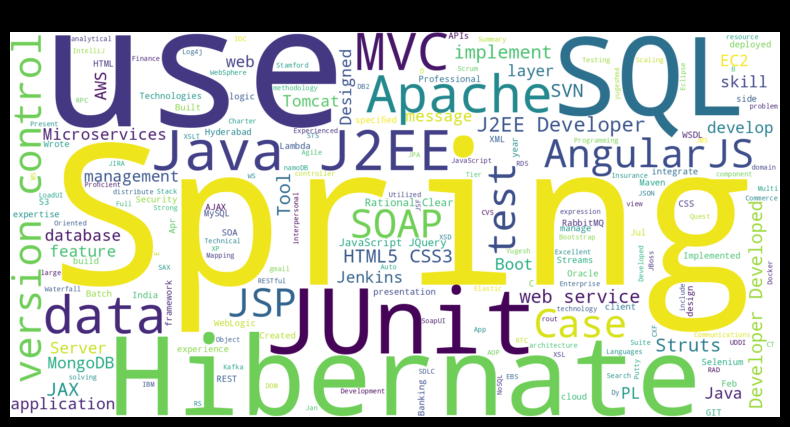

In [49]:
cv_data=resume_eda()
wordcloud(cv_data)

		     Trigrams Visualization


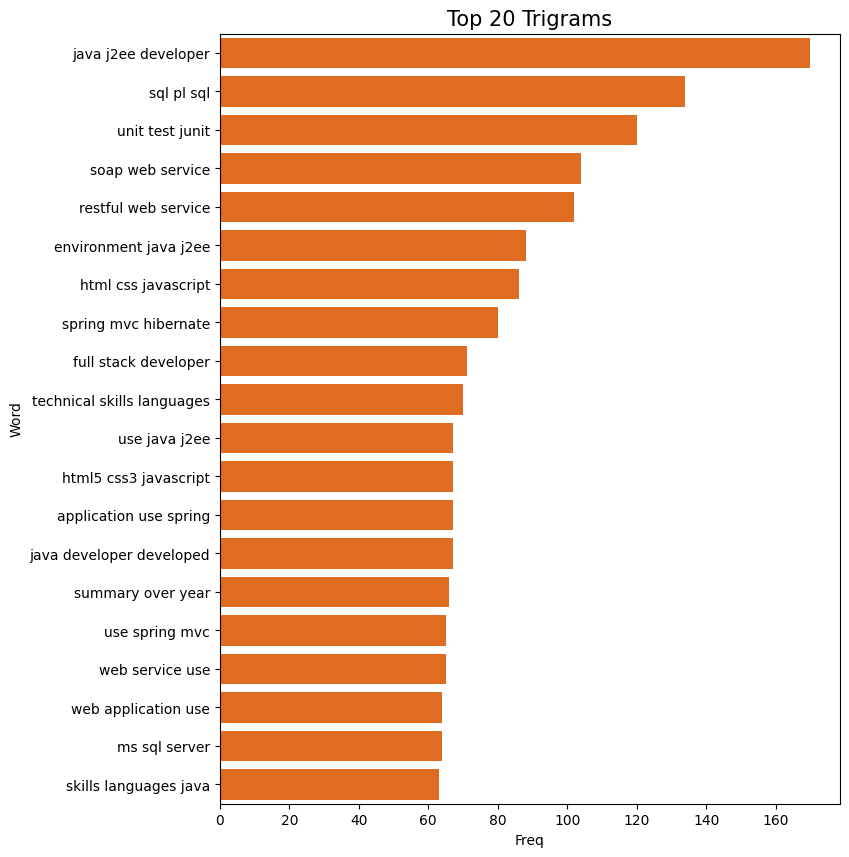

In [50]:
ngrams(df_preprocessed_resume)